In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install keras-tuner --upgrade

# import keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation


In [38]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('/content/drive/MyDrive/FYP/punjabi_completewords_withduplicates.csv')

# Print the size of the dataset before removing NaN values
print("Size of dataset before removing NaN values:", df.shape)

nan_rows = df[df['Word'].isnull() | df['Lemma'].isnull()]
print("\nRows containing NaN values in 'Word' or 'Lemma' columns:")
print(nan_rows)

# Drop rows with NaN values
df.dropna(subset=['Word', 'Lemma'], inplace=True)

# Print the size of the dataset after removing NaN values
print("\nSize of dataset after removing NaN values:", df.shape)

# # # Identify duplicate rows
# duplicate_rows = df[df.duplicated()]

# # Print duplicate rows
# print("\nDuplicate rows:")
# print(duplicate_rows)

# # Remove duplicate rows
# df.drop_duplicates(inplace=True)

# # Print the size of the dataset after removing duplicate values
# print("\nSize of dataset after removing duplicate values:", df.shape)

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2,
                                       random_state=42)
print(len(train_set), len(test_set))

Size of dataset before removing NaN values: (175935, 2)

Rows containing NaN values in 'Word' or 'Lemma' columns:
       Lemma Word
11566    NaN  NaN
11567    NaN  NaN
11568    NaN  NaN
11569    NaN  NaN
11570    NaN  NaN
...      ...  ...
171986   NaN  NaN
171994   NaN  NaN
172002   NaN  NaN
172009   NaN  NaN
172010   NaN  NaN

[119555 rows x 2 columns]

Size of dataset after removing NaN values: (56380, 2)
[('نہاوندیاں', 'نہا'), ('نہاندیاں', 'نہا'), ('نہا', 'نہا'), ('نہائیں', 'نہا'), ('نہاویں', 'نہا'), ('نہاوٗ', 'نہا'), ('نہایو', 'نہا'), ('نہاویو', 'نہا'), ('نہایا', 'نہا'), ('نہاویا', 'نہا'), ('نہاواں', 'نہا'), ('نہائیے', 'نہا'), ('نہاوئیے', 'نہا'), ('نہادا', 'نہا'), ('نہادی', 'نہا'), ('نہادے', 'نہا'), ('نہادیاں', 'نہا'), ('نہایں', 'نہا'), ('نہاو', 'نہا'), ('نہاوے', 'نہا'), ('نہائے', 'نہا'), ('نہاون', 'نہا'), ('نہان', 'نہا'), ('ابل', 'ابل'), ('ابلنا', 'ابل'), ('ابلنی', 'ابل'), ('ابلنے', 'ابل'), ('ابلیاں', 'ابل'), ('ابلدا', 'ابل'), ('ابلدی', 'ابل'), ('ابلدے', 'ابل'), ('ابلدیاں', 'ابل'

In [39]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

In [40]:
print(words)

['رنگاون', 'پکڑواویں', 'تیزنی', 'پچھواویں', 'منگوائیں', 'گُلا', 'ٹَلاں', 'میریو', 'چمڑن', 'بُکھیے', 'منواوے', 'لیڈر', 'پہلی', 'ٹھیکہدار', 'جھسواوندیاں', 'بولاندے', 'سابقہواں', 'خبردارا', 'آپسی', 'پینڈوو', 'بیتوایں', 'عامیو', 'سہوادے', 'فیضل آبادینی', 'ایجنڈیو ', 'چٹاویا', 'گلہویا', 'بولئیں', 'ترجیحو', 'لوٹوٗ', 'ملتانین', 'دفنانی', 'پڑھاندا', 'گلاں', 'کترئیے', 'وڈھویو', 'جھکاوندا', 'جھولواوندے', 'عرس', 'تپاویا', 'چرنے', 'ودیاو', 'تاریخاں', 'کماندے', 'پچوادے', 'بھرتیاں', 'کجواواں', 'ڈبیاں', 'پرتواندے', 'رکھاوندے', 'ادھوری', 'دامو', 'سوچاو', 'اندرونیندا', 'رَلدا', 'گلیو ', 'وڈھیری', 'پیکٹو', 'پھسلیا', 'لیکچرا', 'پیچھےاں', 'عدالتیون', 'ڈلا', 'دھکواوندی', 'جتائے', 'حادثہیا', 'رڑھائے', 'ویکھاون', 'گولڈناں', 'ودیائیں', 'چھڈاو', 'ٹبرو', 'کپڑیو ', 'ٹوٹاندا', 'سرسریندی', 'سون', 'سُٹو', 'نپاویو', 'برآمدی', 'مسکراوندہنے', 'چران', 'کھادی', 'لمکو', 'ہیڈوے', 'بھابیاں', 'آندرو', 'پیلیو', 'مغربییا', 'پٹیو ', 'ذلیلو', 'منگتیو ', 'کہاو', 'چمکادی', 'ڈیگوادے', 'دھوکھےبازا', 'جامنیویو', 'لالیاں', 'ڈراونی', 

In [41]:
print(lemmas)

['رنگا', 'پکڑوا', 'تیز', 'پچھوا', 'منگوا', 'گُلا', 'ٹَل', 'میری', 'چمڑ', 'بُکھی', 'منوا', 'لیڈر', 'پہلی', 'ٹھیکہدار', 'جھسوا', 'بولا', 'سابقہ', 'خبردار', 'آپسی', 'پینڈو', 'بیتوا', 'عام', 'سہوا', 'فیضل آبادی', 'ایجنڈا', 'چٹا', 'گلہ', 'بول', 'ترجیح', 'لوٹ', 'ملتانی', 'دفنا', 'پڑھا', 'گل', 'کتر', 'وڈھ', 'جھکا', 'جھولوا', 'عرس', 'تپا', 'چر', 'ودیا', 'تاریخ', 'کما', 'پچوا', 'بھرتی', 'کجوا', 'ڈب', 'پرتوا', 'رکھا', 'ادھوری', 'دام', 'سوچا', 'اندرونی', 'رَل', 'گلہ', 'وڈھیری', 'پیکٹ', 'پھسل', 'لیکچر', 'پیچھے', 'عدالتی', 'ڈلا', 'دھکوا', 'جتا', 'حادثہ', 'رڑھا', 'ویکھا', 'گولڈن', 'ودیا', 'چھڈا', 'ٹبر', 'کپڑا', 'ٹوٹا', 'سرسری', 'سو', 'سُٹ', 'نپا', 'برآمدی', 'مسکراوندہ', 'چرا', 'کھا', 'لمک', 'ہیڈ', 'بھابی', 'آندر', 'پیلی', 'مغربی', 'پٹہ', 'ذلیل', 'منگتا', 'کہا', 'چمکا', 'ڈیگوا', 'دھوکھےباز', 'جامنی', 'لالا', 'ڈراونی', 'بل', 'پھڑیچوا', 'ڈانگ', 'خرچ', 'تنخواہ', 'چر', 'خالی', 'واگ', 'سادارن', 'جھونپڑ', 'چھیڑوا', 'جرنلسٹ', 'سریا', 'بحالی', 'رکھوا', 'لٹکا', 'ایشیائی', 'عبد', 'چونڈھی', 'پیروکار', 'جاگ', 'پ

In [42]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# Replace 'df' with your DataFrame name if it's different

def check_float_in_dataset(df):
    # Check 'Lemma' column for floats
    lemma_floats = any(isinstance(value, float) for value in df['Lemma'])

    # Check 'Word' column for floats
    word_floats = any(isinstance(value, float) for value in df['Word'])

    return lemma_floats or word_floats

# Usage example:
# If your DataFrame is named 'dataset', you can call the function like this:
result = check_float_in_dataset(df)
print(result)  # This will print True if there are floats, False otherwise


False


In [43]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
tokenizer.fit_on_texts(lemmas)

In [44]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 60


In [45]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ر': 5,
 'ھ': 6,
 'ک': 7,
 'د': 8,
 'ل': 9,
 'م': 10,
 'س': 11,
 'ں': 12,
 'ب': 13,
 'ت': 14,
 'پ': 15,
 'ٹ': 16,
 'ے': 17,
 'گ': 18,
 'ہ': 19,
 'چ': 20,
 'ج': 21,
 'ڑ': 22,
 'ڈ': 23,
 'ئ': 24,
 'ُ': 25,
 'ف': 26,
 'ش': 27,
 'ق': 28,
 'ز': 29,
 ' ': 30,
 'ِ': 31,
 'ح': 32,
 'ع': 33,
 'خ': 34,
 'ص': 35,
 'آ': 36,
 'َ': 37,
 'ٗ': 38,
 'ط': 39,
 'ض': 40,
 'غ': 41,
 'ذ': 42,
 'ث': 43,
 '-': 44,
 'ظ': 45,
 'ٔ': 46,
 'ٰ': 47,
 '/': 48,
 'ّ': 49,
 'ؔ': 50,
 'a': 51,
 'e': 52,
 's': 53,
 'u': 54,
 'r': 55,
 'f': 56,
 'c': 57,
 'n': 58,
 'm': 59}

In [46]:
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [47]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['رنگاون', 'پکڑواویں', 'تیزنی', 'پچھواویں', 'منگوائیں']
[[5, 4, 18, 1, 2, 4], [15, 7, 22, 2, 1, 2, 3, 12], [14, 3, 29, 4, 3], [15, 20, 6, 2, 1, 2, 3, 12], [10, 4, 18, 2, 1, 24, 3, 12]]
['رنگا', 'پکڑوا', 'تیز', 'پچھوا', 'منگوا']
[[5, 4, 18, 1], [15, 7, 22, 2, 1], [14, 3, 29], [15, 20, 6, 2, 1], [10, 4, 18, 2, 1]]


اسلام آبادیوندیاں


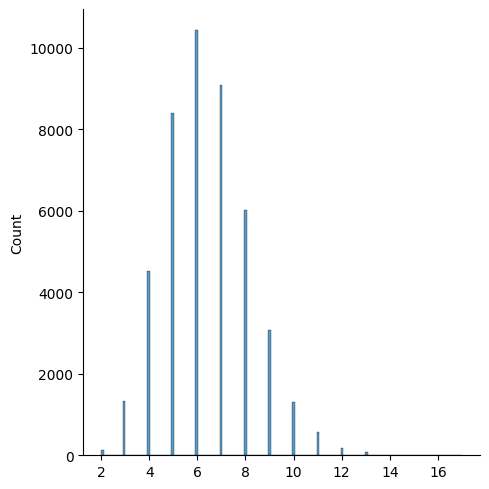

In [48]:
import seaborn as sns
import numpy as np

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [49]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 17


In [50]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[ 5,  4, 18,  1,  2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15,  7, 22,  2,  1,  2,  3, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [14,  3, 29,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15, 20,  6,  2,  1,  2,  3, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10,  4, 18,  2,  1, 24,  3, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18, 25,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [16, 37,  9,  1, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10,  3,  5,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [20, 10, 22,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [13, 25,  7,  6,  3, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [51]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[ 5,  4, 18,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15,  7, 22,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [14,  3, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15, 20,  6,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10,  4, 18,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [18, 25,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [16, 37,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10,  3,  5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [20, 10, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [13, 25,  7,  6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [52]:
## training data

X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')

# ## testing data
# X_test_texts = [n for (n, l) in test_set]
# Y_test_texts = [l for (n, l) in test_set]
# X_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')
# y_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')

In [53]:
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(45104, 17)
(45104, 17)


In [54]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(45104, 60)


In [55]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(45104, 60)


In [56]:
# print(X_test)

In [57]:
print(test_set)

[('فاسڑویو', 'فاسڑ'), ('امریکییں', 'امریکی'), ('پھسل', 'پھسل'), ('امیداں', 'امید'), ('پھٹدا', 'پھٹ'), ('وُنیاں', 'وُن'), ('سِموائے', 'سِموا'), ('لکیوائے', 'لکیوا'), ('جپاون', 'جپا'), ('چُھپون', 'چُھپ'), ('سنگھدی', 'سنگھدی'), ('بُکاں', 'بُک'), ('ولانا', 'ولا'), ('ٹیم', 'ٹیم'), ('فٹنس', 'فٹنس'), ('پوری', 'پوری'), ('پہنچاوندے', 'پہنچا'), ('آزادئیے', 'آزاد'), ('چپٹیو', 'چپٹی'), ('صفت', 'صفت'), ('لیٹواوندا', 'لیٹوا'), ('کڈوانے', 'کڈوا'), ('اکٹھی', 'اکٹھی'), ('جھسواندیاں', 'جھسوا'), ('مچوائیے', 'مچوا'), ('چُھپواویا', 'چُھپوا'), ('ٹھہرواوندے', 'ٹھہروا'), ('امانت', 'امانت'), ('چکوے', 'چک'), ('جوانی', 'جوانی'), ('میٹواندا', 'میٹوا'), ('گھوٹواوندی', 'گھوٹوا'), ('پاکستانیوندیاں', 'پاکستانی'), ('چِریں', 'چِر'), ('مسکراوندے', 'مسکراوندہ'), ('چُھووے', 'چُھو'), ('ویہلیاں', 'ویہلا'), ('ورتائیں', 'ورتا'), ('تُروٗ', 'تُر'), ('حالیہئے', 'حالیہ'), ('کرڑیا', 'کرڑا'), ('مکادا', 'مکا'), ('بلھاوٗ', 'بلھا'), ('لاپروا', 'لاپروا'), ('ذہنیون', 'ذہنی'), ('برفانییں', 'برفانی'), ('صابنو', 'صابن'), ('رُکاوندا', 'رُکا

In [58]:
print(words[2])
print(words_matrix[2,:])

تیزنی
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
print(lemmas[2])
print(lemmas_matrix[2,:])

تیز
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(LSTM(units=64, return_sequences=True))  # Ensure LSTM outputs sequences
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))  # TimeDistributed for sequence prediction

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [62]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
353/353 [==============================] - 16s 40ms/step - loss: 1.1214 - accuracy: 0.7622
Epoch 2/10
353/353 [==============================] - 13s 38ms/step - loss: 0.3064 - accuracy: 0.9283
Epoch 3/10
353/353 [==============================] - 14s 39ms/step - loss: 0.1087 - accuracy: 0.9691
Epoch 4/10
353/353 [==============================] - 15s 42ms/step - loss: 0.0749 - accuracy: 0.9760
Epoch 5/10
353/353 [==============================] - 17s 47ms/step - loss: 0.0625 - accuracy: 0.9789
Epoch 6/10
353/353 [==============================] - 15s 42ms/step - loss: 0.0553 - accuracy: 0.9810
Epoch 7/10
353/353 [==============================] - 15s 43ms/step - loss: 0.0500 - accuracy: 0.9829
Epoch 8/10
353/353 [==============================] - 15s 43ms/step - loss: 0.0458 - accuracy: 0.9844
Epoch 9/10
353/353 [==============================] - 16s 45ms/step - loss: 0.0428 - accuracy: 0.9853
Epoch 10/10
353/353 [==============================] - 16s 44ms/step - loss: 0.040

In [63]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('my_model.keras')

# Print a success message
print("Model saved successfully as 'my_model.keras'")

Model saved successfully as 'my_model.keras'


In [64]:
from keras.models import load_model
def predict_lemma(word, tokenizer, max_len):
  # Convert the word to a sequence of integers
  sequence = tokenizer.texts_to_sequences([word])

  # Pad the sequence to the maximum length
  padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

  # Predict the lemma using the trained model
  predictions = model.predict(padded_sequence)

  # Convert the prediction to the corresponding lemma
  # Since the output is a sequence, we need to take the argmax for each timestep
  lemma_sequence = np.argmax(predictions, axis=-1)[0]

  # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
  lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

  return lemma

In [65]:
# Example usage (Actuall lemma = ڈھگا):
word = 'ڈھگائیں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 460ms/step
The predicted lemma for ڈھگائیں is: ڈھگا


In [66]:
# Example usage (Actuall lemma = ڈراونہ):
word = 'ڈراونہیو'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 30ms/step
The predicted lemma for ڈراونہیو is: ڈراونہ


In [67]:
# Example usage (Actuall lemma = 'تگڑا'):
word = 'تگڑادا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 26ms/step
The predicted lemma for تگڑادا is: تگڑا


In [68]:
# Example usage (Actuall lemma = 'ودا'):
word = 'وداندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 24ms/step
The predicted lemma for وداندیاں is: ودا


In [69]:
# Example usage (Actuall lemma = 'چھڈوا'):
word = 'چھڈواوئیے'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 44ms/step
The predicted lemma for چھڈواوئیے is: چھڈوا


In [70]:
# Example usage (Actuall lemma = چوندهيا):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 29ms/step
The predicted lemma for چوندهيانا is: چون


In [71]:
# Example usage (Actuall lemma = 'مچوا'):
word = 'مچواندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 21ms/step
The predicted lemma for مچواندیاں is: مچوا


In [72]:
# Example usage (Actuall lemma ='جھپٹوا'):
word = 'جھپٹواوندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 23ms/step
The predicted lemma for جھپٹواوندیاں is: جھپٹوا


In [73]:
# Example usage (Actuall lemma ='اُگال''):
word = 'اُگالن'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 24ms/step
The predicted lemma for اُگالن is: اُگال


In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')